In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score #均方误差,平方绝对误差,R square
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [2]:
#changpin data
dataset = pd.read_csv('changpin_use.csv')
X1_changpin = dataset.iloc[:,3:12].values
print(X1_changpin)
Y_changpin = dataset.iloc[:,14].values
print(Y_changpin)
scaler=MinMaxScaler()
X_changpin = scaler.fit_transform(X1_changpin)
print(X_changpin)


[[-7.09386905e+00 -1.15147995e+01  3.44171873e-01 ... -6.79000000e-07
  -1.73000000e-18  1.06619651e-01]
 [-6.52444191e+00 -1.07744531e+01  4.85982359e-01 ... -6.32000000e-06
  -1.73000000e-18  1.06619651e-01]
 [ 1.20123335e+00 -7.12707807e+00  4.76232888e-01 ... -2.19000000e-05
  -1.73000000e-18  1.06619651e-01]
 ...
 [-8.36267181e-01 -1.03265489e+01  8.25828300e-03 ... -5.39000000e-05
  -1.73000000e-18  1.06496896e-01]
 [ 2.56566369e+00 -9.24375143e+00  8.00498420e-02 ... -5.73000000e-05
  -1.73000000e-18  1.06496896e-01]
 [ 2.55590904e+00 -8.45013481e+00  1.62351230e-02 ... -5.25000000e-05
  -1.73000000e-18  1.06484621e-01]]
[ 7037.  7795. 13582. ... 12392. 12134.  9216.]
[[0.23388578 0.35430108 0.52628339 ... 0.97973124 0.         0.03250766]
 [0.24447367 0.36692621 0.54143777 ... 0.97118531 0.         0.03250766]
 [0.38812433 0.42912495 0.54039591 ... 0.94758211 0.         0.03250766]
 ...
 [0.35023919 0.37456433 0.49038644 ... 0.89910314 0.         0.032239  ]
 [0.41349446 0.3930

In [4]:
#changpin站点拟合验证
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_changpin,Y_changpin,test_size=0.2,random_state=0)
print('数据分割完毕')

#Fitting Random_Forest Classification Model
print('模型拟合中')
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators =200,criterion='mse',random_state=0)  #,max_depth=10, min_samples_leaf=25
classifier.fit(X_train,Y_train)
print('模型拟合完毕')

#Predicting the test set results
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(Y_train,Y_train_pred),
                                       mean_squared_error(Y_test,Y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(Y_train,Y_train_pred),
                                            r2_score(Y_test,Y_test_pred)))

#判断特征重要性(无u10和v10)
names = ['t2m','d2m','u10','v10','blh','sp','e','tp','fal']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True))


数据分割完毕
模型拟合中
模型拟合完毕
MSE Train: 605554.558, Test: 3899735.140
R2_Score Train: 0.952, Test: 0.669
Features sorted by their score:
[(0.276, 'fal'), (0.1558, 'v10'), (0.1225, 't2m'), (0.1148, 'd2m'), (0.088, 'blh'), (0.0859, 'sp'), (0.0717, 'e'), (0.0661, 'u10'), (0.0191, 'tp')]


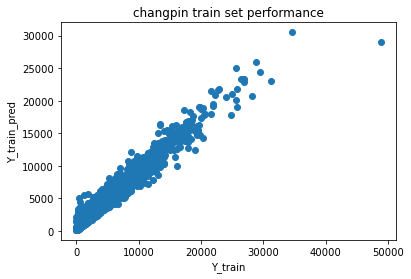

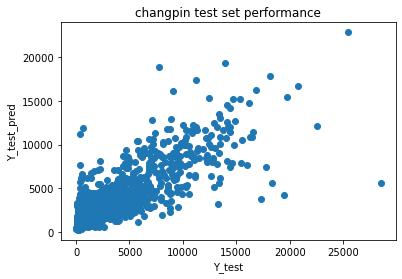

In [5]:
#画图，Y_train和Y_train_pred
plt.figure(1)
x1=Y_train
y1=Y_train_pred
plt.scatter(x1,y1)
plt.xlabel('Y_train')
plt.ylabel("Y_train_pred")
plt.title('changpin train set performance')

plt.figure(2)
x2=Y_test
y2=Y_test_pred
plt.scatter(x2,y2)
plt.xlabel('Y_test')
plt.ylabel("Y_test_pred")
plt.title('changpin test set performance')
plt.show()


In [6]:
#daxing data
daxing = pd.read_csv('daxing_use.csv')
X1_daxing = daxing.iloc[:,3:12].values
print('daxing = ',X1_daxing)
Y_daxing = daxing.iloc[:,14].values
print(Y_daxing)
scaler=MinMaxScaler()
X_daxing = scaler.fit_transform(X1_daxing)
print(X_daxing)

daxing =  [[ 3.11918755e+01  1.95601832e+01 -3.55574246e-01 ... -4.49271000e-04
  -1.73000000e-18  1.62227394e-01]
 [ 3.05273406e+01  2.08843271e+01 -1.23479926e+00 ... -2.52529000e-04
  -1.73000000e-18  1.62227394e-01]
 [ 2.85020334e+01  1.97526081e+01 -4.57057375e-01 ... -1.68404000e-04
  -1.73000000e-18  1.62215119e-01]
 ...
 [-2.84084580e+00 -8.27836574e+00 -3.88367921e-01 ... -2.15000000e-05
  -1.73000000e-18  1.48773512e-01]
 [ 1.07198436e+00 -7.26514561e+00 -2.18638495e-01 ... -2.35000000e-05
  -1.73000000e-18  1.48748961e-01]
 [ 1.50118854e+00 -7.21404975e+00 -7.46122200e-02 ... -2.23000000e-05
  -1.73000000e-18  1.48724410e-01]]
[ 9558.  8404.  6824. ...  8185. 12982. 11641.]
[[0.87367351 0.81913397 0.63541667 ... 0.29647478 0.         0.04183343]
 [0.85946341 0.8472328  0.5474734  ... 0.59275378 0.         0.04183343]
 [0.81615519 0.82321729 0.62526596 ... 0.71943986 0.         0.04179863]
 ...
 [0.14593383 0.22838951 0.63213652 ... 0.94066649 0.         0.00368914]
 [0.22960

In [7]:
#daxing站点拟合验证
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_daxing,Y_daxing,test_size=0.15,random_state=1)
print('数据分割完毕')

#Fitting Random_Forest Classification Model
print('模型拟合中')
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators =100,criterion='mse',random_state=0)  #,max_depth=10, min_samples_leaf=25
classifier.fit(X_train,Y_train)
print('模型拟合完毕')

#Predicting the test set results
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(Y_train,Y_train_pred),
                                       mean_squared_error(Y_test,Y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(Y_train,Y_train_pred),
                                            r2_score(Y_test,Y_test_pred)))

#判断特征重要性(无u10和v10)
names = ['t2m','d2m','u10','v10','blh','sp','e','tp','fal']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True))


数据分割完毕
模型拟合中
模型拟合完毕
MSE Train: 1562809.905, Test: 11359456.204
R2_Score Train: 0.955, Test: 0.673
Features sorted by their score:
[(0.2361, 'fal'), (0.1892, 'v10'), (0.1177, 'sp'), (0.1149, 'd2m'), (0.1044, 'u10'), (0.0829, 't2m'), (0.0745, 'e'), (0.0721, 'blh'), (0.0082, 'tp')]


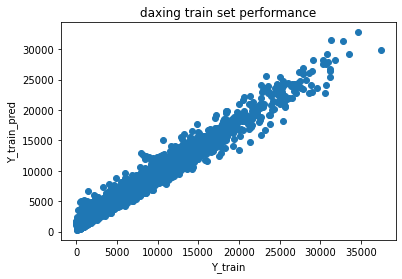

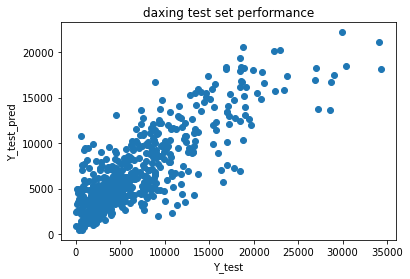

In [8]:
#画图，Y_train和Y_train_pred
plt.figure(1)
x1=Y_train
y1=Y_train_pred
plt.scatter(x1,y1)
plt.xlabel('Y_train')
plt.ylabel("Y_train_pred")
plt.title('daxing train set performance')

plt.figure(2)
x2=Y_test
y2=Y_test_pred
plt.scatter(x2,y2)
plt.xlabel('Y_test')
plt.ylabel("Y_test_pred")
plt.title('daxing test set performance')
plt.show()


In [9]:
#miyun data
miyun = pd.read_csv('miyun_use.csv')
X1_miyun = miyun.iloc[:,3:12].values
print('miyun = ',X1_miyun)
Y_miyun = miyun.iloc[:,14].values
print(Y_miyun)
scaler=MinMaxScaler()
X_miyun = scaler.fit_transform(X1_miyun)
print(X_miyun)


miyun =  [[-5.99525266e+00 -8.92086905e+00  2.75039260e-01 ... -2.67000000e-07
  -1.73000000e-18  1.47816028e-01]
 [-5.18927550e+00 -8.51427643e+00  2.66176105e-01 ... -5.66000000e-06
  -1.73000000e-18  1.47816028e-01]
 [ 1.44074187e-01 -5.85185575e+00 -6.08743290e-02 ... -2.09000000e-05
  -1.73000000e-18  1.47791477e-01]
 ...
 [-3.07129918e+00 -5.38547009e+00  1.95726615e+00 ...  1.78000000e-06
  -1.73000000e-18  1.47693273e-01]
 [-3.42978222e+00 -5.44091454e+00  2.10572401e+00 ...  2.52000000e-06
  -1.73000000e-18  1.47705549e-01]
 [-3.79801990e+00 -5.71704964e+00  2.01930824e+00 ...  2.66000000e-06
  -1.73000000e-18  1.47705549e-01]]
[6405. 4999. 6271. ... 4626. 4892. 4463.]
[[0.20096141 0.36451685 0.5528892  ... 0.98644816 0.         0.02714418]
 [0.21602041 0.37145614 0.55202287 ... 0.97878484 0.         0.02714418]
 [0.31566957 0.4168955  0.52005544 ... 0.95712918 0.         0.02700206]
 ...
 [0.25559302 0.42485528 0.71731785 ... 0.98935689 0.         0.02643359]
 [0.24889507 0.4

In [10]:
#miyun站点拟合验证
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_miyun,Y_miyun,test_size=0.2,random_state=0)
print('数据分割完毕')

#Fitting Random_Forest Classification Model
print('模型拟合中')
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators =100,criterion='mse',random_state=0)  #,max_depth=10, min_samples_leaf=25
classifier.fit(X_train,Y_train)
print('模型拟合完毕')

#Predicting the test set results
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(Y_train,Y_train_pred),
                                       mean_squared_error(Y_test,Y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(Y_train,Y_train_pred),
                                            r2_score(Y_test,Y_test_pred)))

#判断特征重要性(无u10和v10)
names = ['t2m','d2m','u10','v10','blh','sp','e','tp','fal']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True))


数据分割完毕
模型拟合中
模型拟合完毕
MSE Train: 109305.941, Test: 956619.880
R2_Score Train: 0.966, Test: 0.730
Features sorted by their score:
[(0.3538, 'fal'), (0.1586, 'd2m'), (0.1342, 'v10'), (0.1188, 'sp'), (0.0671, 't2m'), (0.0558, 'u10'), (0.0533, 'e'), (0.0441, 'blh'), (0.0143, 'tp')]


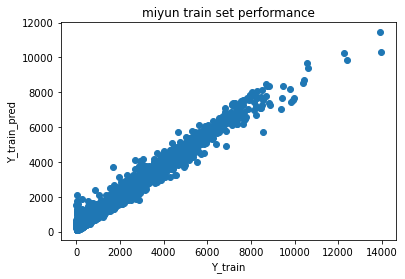

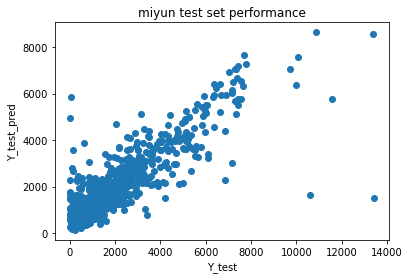

In [11]:
#画图，Y_train和Y_train_pred
plt.figure(1)
x1=Y_train
y1=Y_train_pred
plt.scatter(x1,y1)
plt.xlabel('Y_train')
plt.ylabel("Y_train_pred")
plt.title('miyun train set performance')

plt.figure(2)
x2=Y_test
y2=Y_test_pred
plt.scatter(x2,y2)
plt.xlabel('Y_test')
plt.ylabel("Y_test_pred")
plt.title('miyun test set performance')
plt.show()

In [12]:
#all data
all_data = pd.read_csv('all_data.csv')
X1 = all_data.iloc[:,3:12].values
print('all_data = ',X1)
Y = all_data.iloc[:,14].values
print(Y)
scaler=MinMaxScaler()
X = scaler.fit_transform(X1)
print(X)
print(X1[1,:])

all_data =  [[ 3.11918755e+01  1.95601832e+01 -3.55574246e-01 ... -4.49271000e-04
  -1.73000000e-18  1.62227394e-01]
 [ 3.05273406e+01  2.08843271e+01 -1.23479926e+00 ... -2.52529000e-04
  -1.73000000e-18  1.62227394e-01]
 [ 2.85020334e+01  1.97526081e+01 -4.57057375e-01 ... -1.68404000e-04
  -1.73000000e-18  1.62215119e-01]
 ...
 [-3.07129918e+00 -5.38547009e+00  1.95726615e+00 ...  1.78000000e-06
  -1.73000000e-18  1.47693273e-01]
 [-3.42978222e+00 -5.44091454e+00  2.10572401e+00 ...  2.52000000e-06
  -1.73000000e-18  1.47705549e-01]
 [-3.79801990e+00 -5.71704964e+00  2.01930824e+00 ...  2.66000000e-06
  -1.73000000e-18  1.47705549e-01]]
[9558. 8404. 6824. ... 4626. 4892. 4463.]
[[0.89594072 0.85556173 0.54965491 ... 0.34420359 0.         0.15420988]
 [0.8842354  0.87741044 0.47358129 ... 0.62038233 0.         0.15420988]
 [0.848561   0.85873679 0.54087423 ... 0.73847372 0.         0.15418301]
 ...
 [0.29241838 0.44395214 0.74976994 ... 0.97737137 0.         0.12240073]
 [0.28610395 

In [13]:
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print('数据分割完毕')


#Fitting Random_Forest Classification Model
print('模型拟合中')
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators =200,criterion='mse',
                                   random_state=0)  #,max_depth=10, min_samples_leaf=25
classifier.fit(X_train,Y_train)
print('模型拟合完毕')

#Predicting the test set results
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(Y_train,Y_train_pred),
                                       mean_squared_error(Y_test,Y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(Y_train,Y_train_pred),
                                            r2_score(Y_test,Y_test_pred)))

#判断特征重要性(无u10和v10)
names = ['t2m','d2m','u10','v10','blh','sp','e','tp','fal']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True))


数据分割完毕
模型拟合中
模型拟合完毕
MSE Train: 648055.362, Test: 5760914.566
R2_Score Train: 0.964, Test: 0.712
Features sorted by their score:
[(0.2353, 'sp'), (0.1951, 'fal'), (0.1476, 'v10'), (0.1324, 'd2m'), (0.0857, 't2m'), (0.0728, 'u10'), (0.0628, 'blh'), (0.0571, 'e'), (0.0111, 'tp')]


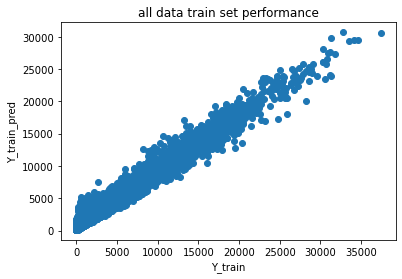

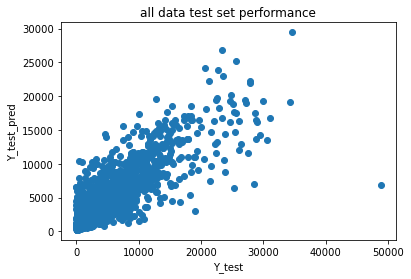

In [14]:
#画图，Y_train和Y_train_pred
plt.figure(1)
x1=Y_train
y1=Y_train_pred
plt.scatter(x1,y1)
plt.xlabel('Y_train')
plt.ylabel("Y_train_pred")
plt.title('all data train set performance')

plt.figure(2)
x2=Y_test
y2=Y_test_pred
plt.scatter(x2,y2)
plt.xlabel('Y_test')
plt.ylabel("Y_test_pred")
plt.title('all data test set performance')
plt.show()


In [15]:
#适用all_data训练好的random forest模型估计changping站点的bc
print(X_changpin)
Y_all_changpin_pred = classifier.predict(X_changpin)
print("R2_Score : %.3f" % (r2_score(Y_changpin,Y_all_changpin_pred)))
print(Y_all_changpin_pred) 
print(Y_changpin)



[[0.23388578 0.35430108 0.52628339 ... 0.97973124 0.         0.03250766]
 [0.24447367 0.36692621 0.54143777 ... 0.97118531 0.         0.03250766]
 [0.38812433 0.42912495 0.54039591 ... 0.94758211 0.         0.03250766]
 ...
 [0.35023919 0.37456433 0.49038644 ... 0.89910314 0.         0.032239  ]
 [0.41349446 0.39302929 0.49805834 ... 0.89395225 0.         0.032239  ]
 [0.41331308 0.40656285 0.49123887 ... 0.90122409 0.         0.03221213]]
R2_Score : 0.130
[8966.9765 3773.739  1289.2845 ... 7111.42   5853.76   6078.685 ]
[ 7037.  7795. 13582. ... 12392. 12134.  9216.]


In [3]:
#changpin data
dataset = pd.read_csv('changpin_log.csv')
X1_changpin = dataset.iloc[:,5:14].values
print(X1_changpin)
Y_changpin = dataset.iloc[:,17].values
print(Y_changpin)
scaler=MinMaxScaler()
X_changpin = scaler.fit_transform(X1_changpin)
print(X_changpin)


[[-7.09386905e+00 -1.15147995e+01  3.44171873e-01 ... -6.79000000e-07
  -1.73000000e-18  1.06619651e-01]
 [-6.52444191e+00 -1.07744531e+01  4.85982359e-01 ... -6.32000000e-06
  -1.73000000e-18  1.06619651e-01]
 [ 1.20123335e+00 -7.12707807e+00  4.76232888e-01 ... -2.19000000e-05
  -1.73000000e-18  1.06619651e-01]
 ...
 [-8.36267181e-01 -1.03265489e+01  8.25828300e-03 ... -5.39000000e-05
  -1.73000000e-18  1.06496896e-01]
 [ 2.56566369e+00 -9.24375143e+00  8.00498420e-02 ... -5.73000000e-05
  -1.73000000e-18  1.06496896e-01]
 [ 2.55590904e+00 -8.45013481e+00  1.62351230e-02 ... -5.25000000e-05
  -1.73000000e-18  1.06484621e-01]]
[8.85893722 8.96123778 9.51650067 ... 9.42480638 9.40376671 9.12869638]
[[0.23388578 0.35430108 0.52628339 ... 0.97973124 0.         0.03250766]
 [0.24447367 0.36692621 0.54143777 ... 0.97118531 0.         0.03250766]
 [0.38812433 0.42912495 0.54039591 ... 0.94758211 0.         0.03250766]
 ...
 [0.35023919 0.37456433 0.49038644 ... 0.89910314 0.         0.03223

In [4]:
#changpin站点拟合验证
#Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_changpin,Y_changpin,test_size=0.2,random_state=0)
print('数据分割完毕')

#Fitting Random_Forest Classification Model
print('模型拟合中')
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators =100,criterion='mse',random_state=0)  #,max_depth=10, min_samples_leaf=25
classifier.fit(X_train,Y_train)
print('模型拟合完毕')

#Predicting the test set results
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(Y_train,Y_train_pred),
                                       mean_squared_error(Y_test,Y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(Y_train,Y_train_pred),
                                            r2_score(Y_test,Y_test_pred)))

#判断特征重要性(无u10和v10)
names = ['t2m','d2m','u10','v10','blh','sp','e','tp','fal']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), reverse=True))


数据分割完毕
模型拟合中
模型拟合完毕
MSE Train: 0.067, Test: 0.418
R2_Score Train: 0.948, Test: 0.675
Features sorted by their score:
[(0.2961, 'v10'), (0.1729, 'fal'), (0.1011, 'd2m'), (0.0842, 'u10'), (0.0842, 'sp'), (0.0819, 'blh'), (0.08, 't2m'), (0.0757, 'e'), (0.024, 'tp')]


In [6]:
#data test
dataset = pd.read_csv('data_test.csv')
X_test1 = dataset.iloc[:,1:10].values
print("X_test1=",X_test1)
scaler=MinMaxScaler()
X_test = scaler.fit_transform(X_test1)
print(X_test)
Y_test_pred = classifier.predict(X_test)
print(Y_test_pred)

print("R2_Score Train: %.3f, Test: %.3f" % r2_score(Y_test,Y_test_pred))


X_test1= [[ 2.22714924e+00  1.57486719e+00  2.66810896e+02  2.60842671e+02
   8.88884291e+01 -6.05064714e-08  8.96635673e+04 -1.73472348e-18
   1.72379183e-01]
 [ 2.63441123e+00  1.39888872e+00  2.65772027e+02  2.60637200e+02
   7.40615300e+01 -2.30426270e-08  8.97696328e+04 -1.73472348e-18
   1.65099847e-01]
 [ 2.43897865e+00  1.16063370e+00  2.65563522e+02  2.60063187e+02
   3.95206532e+01 -2.30426270e-08  9.16327288e+04 -1.73472348e-18
   1.81487560e-01]
 [ 1.88547460e+00  6.32452116e-02  2.65212355e+02  2.59850107e+02
   2.65988864e+01 -1.54166082e-07  9.21626907e+04 -1.73472348e-18
   1.75349840e-01]
 [ 1.56994626e+00 -4.35910859e-01  2.64772176e+02  2.60095802e+02
   2.52735770e+01 -4.16412993e-07  9.43527610e+04 -1.73472348e-18
   1.69678586e-01]
 [ 1.32753896e+00 -8.67600656e-01  2.64133247e+02  2.59785965e+02
   2.68473819e+01 -6.03732215e-07  9.56687051e+04 -1.73472348e-18
   1.51780995e-01]
 [ 9.10970660e-01 -1.13510679e+00  2.65387938e+02  2.60623067e+02
   2.58533998e+01 -